In [3]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

In [4]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [5]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 4  # time of evolution
omega = jnp.pi/T  # detuning2=1
eps = -4
Kb = 10

In [6]:
# operators
a, b = dq.destroy(na, nb)

g2 = 1 # coupling strength

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

|██████████| 100.0% ◆ elapsed 451.48ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:03<00:00, 15.65it/s]


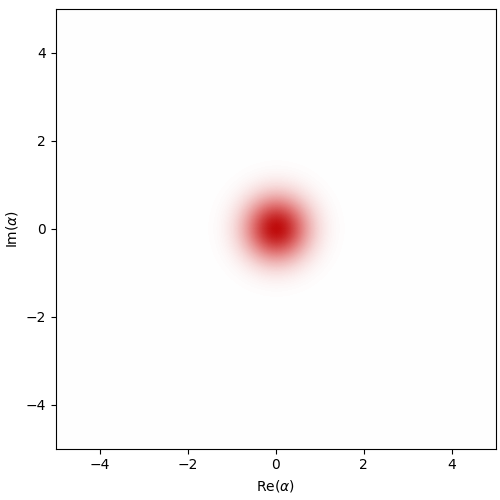

In [7]:
# initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state
t_save = jnp.linspace(0, T, 50)  # save times

jump_ops = [jnp.sqrt(Kb)*b]
exp_ops = [dq.dag(a) @ a, dq.parity(na*nb)]
res = dq.mesolve(H,jump_ops, psi0, t_save, exp_ops=exp_ops)

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a, fps=120)

# dq.plot.wigner_gif(res.states)

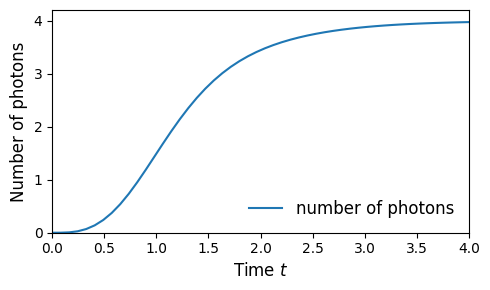

In [8]:

# plot the observable against time
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_save, res.expects[0].real, label=r"number of photons")
ax.set_ylim((0, 4.2))
ax.set_xlim((0, T))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()



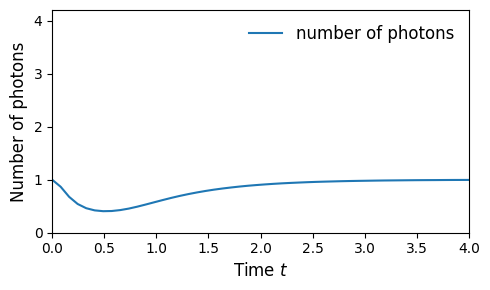

In [9]:
# plot the observable against time
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_save, res.expects[1].real, label=r"number of photons")
ax.set_ylim((0, 4.2))
ax.set_xlim((0, T))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()
